In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [71]:
import tensorflow as tf
from tensorflow import keras


from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Dropout
# from keras.layers import Flatten
# from keras.constraints import maxnorm
# from keras.optimizers import SGD
# from keras.layers.convolutional import Conv2D
# from keras.layers.convolutional import MaxPooling2D
# from keras.utils import np_utils

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib

import numpy
import scipy.ndimage as ndimage
import os
print(tf.__version__)

2.1.0


In [3]:
dataset = tf.data.Dataset.from_tensor_slices([8,3,0,8,2,1])
print(dataset)

<TensorSliceDataset shapes: (), types: tf.int32>


In [4]:
for elem in dataset:
  print(elem.numpy())

8
3
0
8
2
1


In [5]:
it=iter(dataset)
print(next(it).numpy())

8


In [6]:
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic_lines = tf.data.TextLineDataset(titanic_file)

In [7]:
def plot_batch_sizes(ds):
  batch_sizes = [batch.shape[0] for batch in ds]
  plt.bar(range(len(batch_sizes)), batch_sizes)
  plt.xlabel('Batch number')
  plt.ylabel('Batch Size')

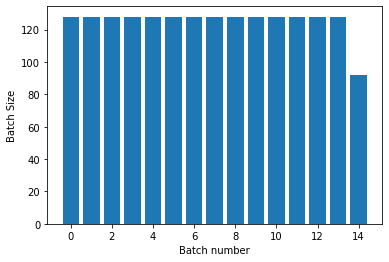

In [8]:
titanic_batches = titanic_lines.repeat(3).batch(128)
plot_batch_sizes(titanic_batches)

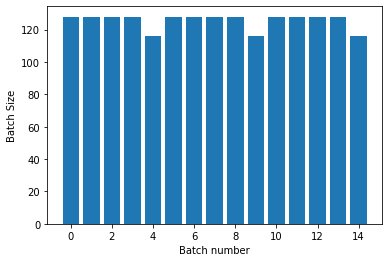

In [9]:
titanic_batches = titanic_lines.batch(128).repeat(3)
plot_batch_sizes(titanic_batches)

In [10]:
epochs = 3
dataset = titanic_lines.batch(128)

for epoch in range(epochs):
  for batch in dataset:
    print(batch.shape)
  print("End of epoch: ",epoch)

(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  0
(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  1
(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  2


In [11]:
batch_size = 20

lines = tf.data.TextLineDataset(titanic_file)
counter = tf.data.experimental.Counter()

dataset = tf.data.Dataset.zip((counter, lines))
dataset = dataset.shuffle(buffer_size=100)
dataset = dataset.batch(batch_size)
dataset

<BatchDataset shapes: ((None,), (None,)), types: (tf.int64, tf.string)>

In [13]:
n,line_batch = next(iter(dataset))
print(n.numpy())

[ 10  56  44  31  50 101  24  42  94  35 107  86  57  54  87  33  78   4
  17  84]


In [43]:
imagedata = r'images\*'
list_ds = tf.data.Dataset.list_files(str(imagedata))

In [51]:
def parse_image(filename):
  parts = tf.strings.split(file_path, '/')
  label = parts[-2]
  
  image = tf.io.read_file(filename)
  image = tf.image.decode_jpeg(image)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image,[128,128])
  return image,label

In [52]:
file_path = next(iter(list_ds))
image, label = parse_image(file_path)

def show(image,label):
  plt.figure()
  plt.imshow(image)
  plt.title(label.numpy().decode('utf-8'))
  
show(image,label)

InvalidArgumentError: slice index -1 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

In [54]:
image_ds = list_ds.map(parse_image)

for image,label in image_ds.take(1):
  show(image,label)

InvalidArgumentError: slice index -1 of dimension 0 out of bounds.
	 [[{{node strided_slice}}]]

In [46]:
def random_state(image):
  image = ndimage.rotate(image, np.random.uniform(-30,30), reshape=Flase)
  return image

In [47]:
image, label = next(iter(image_ds))
image = random_rotate_image(image)
show(image, label)

NameError: name 'image_ds' is not defined

In [55]:
def random_rotate_image(image):
  image = ndimage.rotate_image(image)
  show(image,label)

In [58]:
image, label = next(iter(image_ds))
image = random_rotate_image(image)
show(image, label)

InvalidArgumentError: slice index -1 of dimension 0 out of bounds.
	 [[{{node strided_slice}}]]

# keras

In [59]:
train, test =tf.keras.datasets.fashion_mnist.load_data()

images, labels = train
images = images/255.0
labels = labels.astype(np.int32)

4423680/4422102 [==============================] - 1s 0us/step


In [69]:
fmnist_train_ds = tf.data.Dataset.from_tensor_slices((images, labels))
fmnist_train_ds = fmnist_train_ds.shuffle(5000).batch(256)

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10,activation = 'relu'),
  tf.keras.layers.Dense(10,activation = 'softmax')
  
])

model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(),

              metrics=['accuracy'])

In [70]:
model.fit(fmnist_train_ds, epochs=2)

Train for 235 steps
Epoch 1/2
235/235 [==============================] - 1s 5ms/step - loss: 1.1097 - accuracy: 0.6108
Epoch 2/2
235/235 [==============================] - 1s 4ms/step - loss: 0.6025 - accuracy: 0.7976


In [71]:
loss, accuracy = model.evaluate(fmnist_train_ds.repeat(), steps=10)
print("Loss : ",loss)
print("Accuracy : ",accuracy)

10/10 [==============================] - 0s 11ms/step - loss: 0.5510 - accuracy: 0.8090
Loss :  0.5509925782680511
Accuracy :  0.8089844


In [73]:
predict_ds = tf.data.Dataset.from_tensor_slices(images).batch(32)
result = model.predict(predict_ds, steps = 10)
print(result.shape)

(320, 10)


In [77]:
result = model.predict(fmnist_train_ds, steps = 10)
print(result.shape)

(2560, 10)


# tf.estimator

# tf.data

# text data LSTM

In [4]:
import tensorflow_datasets as tfds

In [8]:
DIRECTORY_URL = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/'
FILE_NAMES = ['cowper.txt','derby.txt','butler.txt']

for name in FILE_NAMES:
  text_dir = tf.keras.utils.get_file(name, origin=DIRECTORY_URL+name)
  
parent_dir = os.path.dirname(text_dir)
print(parent_dir)

C:\Users\amak7\.keras\datasets


In [10]:
def labeler(example, index):
  return example, tf.cast(index, tf.int64)
labeled_data_sets = []

for i, file_name in enumerate(FILE_NAMES):
  lines_dataset = tf.data.TextLineDataset(os.path.join(parent_dir, file_name))
  labeled_dataset = lines_dataset.map(lambda ex: labeler(ex,i))
  labeled_data_sets.append(labeled_dataset)

In [11]:
BUFFER_SIZE = 50000
BATCH_SIZE = 64
TAKE_SIZE = 5000

In [12]:
all_labeled_data = labeled_data_sets[0]
for labeled_dataset in labeled_data_sets[1:]:
  all_labeled_data = all_labeled_data.concatenate(labeled_dataset)
  
all_labeled_data = all_labeled_data.shuffle(BUFFER_SIZE, reshuffle_each_iteration=False)

In [13]:
for ex in all_labeled_data.take(5):
  print(ex)

(<tf.Tensor: shape=(), dtype=string, numpy=b'But close conflicting and of one mind all'>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'criers round to call the people in assembly. So they called them, and'>, <tf.Tensor: shape=(), dtype=int64, numpy=2>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'Neptune, lord of the earthquake, should crack the ground over his head,'>, <tf.Tensor: shape=(), dtype=int64, numpy=2>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'more fiercely when it is well alight upon the mountains, nor does the'>, <tf.Tensor: shape=(), dtype=int64, numpy=2>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'the side of the river Simois till he came to the hill Callicolone.'>, <tf.Tensor: shape=(), dtype=int64, numpy=2>)


In [16]:
tokenizer = tfds.features.text.Tokenizer()

vocabulary_set = set()
for text_tensor,_ in all_labeled_data:
  some_tokens = tokenizer.tokenize(text_tensor.numpy())
  vocabulary_set.update(some_tokens)
  
vocab_size = len(vocabulary_set)
vocab_size

17178

In [18]:
encoder = tfds.features.text.TokenTextEncoder(vocabulary_set)

In [19]:
example_text = next(iter(all_labeled_data))[0].numpy()
print(example_text)

b'But close conflicting and of one mind all'


In [20]:
encoded_example = encoder.encode(example_text)
print(encoded_example)

[12190, 2700, 6039, 6373, 10066, 1705, 2560, 2035]


In [21]:
def encode(text_tensor, label):
  encoded_text = encoder.encode(text_tensor.numpy())
  return encoded_text,label

def encode_map_fn(text,label):
  return tf.py_function(encode,inp=[text,label], Tout=(tf.int64,tf.int64))

all_encoded_data = all_labeled_data.map(encode_map_fn)

In [25]:
train_data = all_encoded_data.skip(TAKE_SIZE).shuffle(BUFFER_SIZE)
train_data = train_data.padded_batch(BATCH_SIZE, padded_shapes=([-1],[]))

test_data = all_encoded_data.take(TAKE_SIZE)
test_data = test_data.padded_batch(BATCH_SIZE, padded_shapes=([-1],[]))

In [26]:
sample_text, sample_labels = next(iter(test_data))
sample_text[0], sample_labels[0]

(<tf.Tensor: shape=(16,), dtype=int64, numpy=
 array([12190,  2700,  6039,  6373, 10066,  1705,  2560,  2035,     0,
            0,     0,     0,     0,     0,     0,     0], dtype=int64)>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>)

In [27]:
vocab_size += 1

# Model

In [28]:
model = tf.keras.Sequential()


In [29]:
model.add(tf.keras.layers.Embedding(vocab_size, 64))

# First neural network (MNIST Fashion)

In [32]:
fashion_mnist = keras.datasets.fashion_mnist

In [33]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [34]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [37]:
train_images.shape

(60000, 28, 28)

In [39]:
len(train_labels)

60000

In [40]:
train_images.shape

(60000, 28, 28)

In [42]:
test_images.shape

(10000, 28, 28)

In [44]:
len(test_labels)

10000

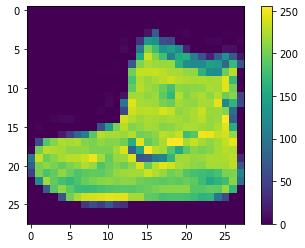

In [49]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [50]:
train_images = train_images / 255.0
test_images = test_images / 255.0

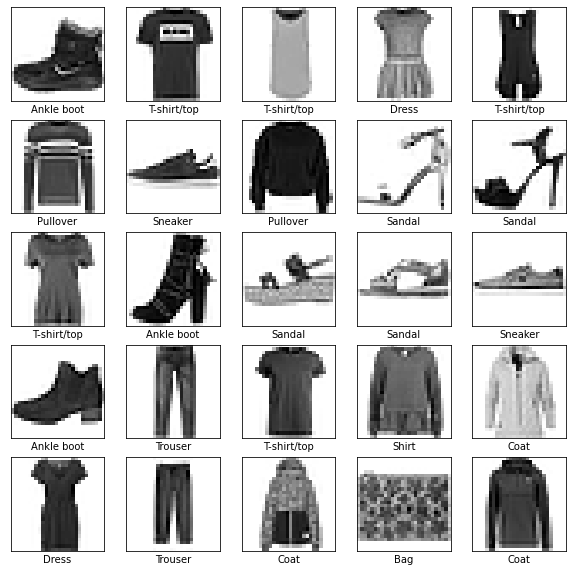

In [53]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

# Model

In [83]:
model =  keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

# model = models.Sequential()
# model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# model.add(layers.MaxPooling2D((2, 2), strides=2))
# model.add(layers.Conv2D(4, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2), strides=2))
# model.add(layers.Flatten())
# model.add(layers.Dense(10, activation='softmax'))

In [84]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [113]:
history = model.fit(train_images,train_labels,epochs=15)
#model.fit(train_images,train_labels,epochs=10)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1969 - accuracy: 0.9244
Epoch 2/15
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1887 - accuracy: 0.9274s - loss: 0
Epoch 3/15
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1822 - accuracy: 0.9297
Epoch 4/15
60000/60000 [==============================] - 4s 63us/sample - loss: 0.1790 - accuracy: 0.9318
Epoch 5/15
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1742 - accuracy: 0.9332
Epoch 6/15
60000/60000 [==============================] - 4s 63us/sample - loss: 0.1693 - accuracy: 0.9353
Epoch 7/15
60000/60000 [==============================] - 4s 62us/sample - loss: 0.1653 - accuracy: 0.9359
Epoch 8/15
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1589 - accuracy: 0.9391
Epoch 9/15
60000/60000 [==============================] - 4s 62us/sample - loss: 0.1502 - accuracy: 0.9421
Epo

# Metrics

In [114]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\n Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 55us/sample - loss: 0.4600 - accuracy: 0.8906

 Test accuracy: 0.8906


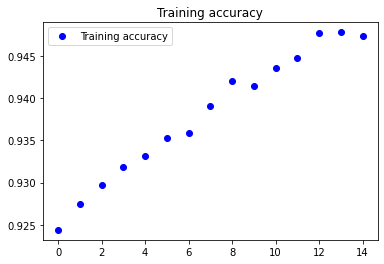

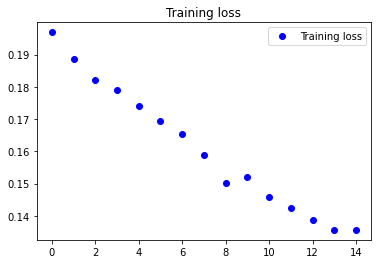

In [122]:
accuracy = history.history['accuracy']

loss = history.history['loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')

plt.title('Training accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')

plt.title('Training loss')
plt.legend()
plt.show()

In [123]:
predictions = model.predict(test_images)

In [124]:
predictions[0]

array([2.2481376e-19, 1.0835043e-14, 2.0865890e-15, 6.1608082e-20,
       1.2374651e-13, 1.1875561e-08, 9.7246721e-14, 5.1891497e-08,
       3.7248587e-15, 9.9999988e-01], dtype=float32)

In [125]:
np.argmax(predictions[0])

9

In [126]:
test_labels[0]

9

In [127]:
img=test_images[0]
img = (np.expand_dims(img,0))
predictions_single = model.predict(img)

In [128]:
def plot_value_array(i,predictions_array,true_label):
  predictions_array,true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10),predictions_array,color='red')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('grey')

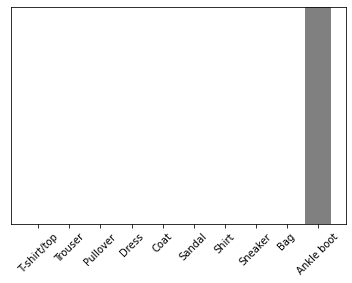

In [129]:
plot_value_array(0,predictions_single, test_labels)
_= plt.xticks(range(10),class_names,rotation=45)

In [130]:
np.argmax(predictions_single[0])

9